In [1]:
import numpy as np
import pandas as pd

In [2]:
import cv2

In [3]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torch
from tqdm import tqdm as tqdm

In [4]:
torch.cuda.device_count()

4

In [5]:
torch.cuda.is_available()

True

In [6]:
for i in range(4):
    print(torch.cuda.get_device_name(i))

Tesla V100-PCIE-16GB
Tesla V100-PCIE-16GB
Tesla V100-PCIE-16GB
Tesla V100-PCIE-16GB


In [4]:
from os import listdir
import re

directory_path = '/data/burenko/datasets/pet-ct'
file_types = ['npy']
imgs = {}
text = []
for dir_content in listdir(directory_path):
    if dir_content.split('.')[-1] == 'npy':
        vec = np.load(directory_path + '/' + dir_content)
        imgs[dir_content.split('.')[0]] = vec
    if dir_content.split('.')[-1] == 'txt':
        with open(directory_path + '/' + dir_content, 'r') as file:
            data = file.read().rstrip().replace('\n', ' ')
            data = re.sub( r'[\(\)]', '', data)
            text.append(data)

In [25]:
lens = []
for key, img in imgs.items():
    lens.append([key, img.shape[0]])
sorted(lens, reverse = True, key = lambda x: x[1])

[['LRC_2414-2614_990004970_70004067', 551],
 ['LRC_2414-2614_70000980_70004013', 551],
 ['LRC_2414-2614_990004972_70004119', 551],
 ['LRC_2414-2614_990005002_70004127', 551],
 ['LRC_2414-2614_70000993_70004084', 551],
 ['LRC_2414-2614_990005021_70004134', 551],
 ['LRC_2414-2614_990005110_70004205', 551],
 ['LRC_2414-2614_70000890_70004185', 551],
 ['LRC_2414-2614_990002892_70004198', 551],
 ['LRC_2414-2614_990004968_70004065', 551],
 ['LRC_2414-2614_70000996_70004080', 551],
 ['LRC_2414-2614_70000997_70004103', 551],
 ['LRC_2414-2614_990002559_70004024', 515],
 ['LRC_2414-2614_990005085_70004209', 479],
 ['LRC_2414-2614_990005012_70004113', 479],
 ['LRC_2414-2614_990004969_70004062', 371],
 ['LRC_2414-2614_990002558_70004089', 371],
 ['LRC_2414-2614_990005070_70004190', 371],
 ['LRC_2414-2614_990004975_70004072', 371],
 ['LRC_2414-2614_990005058_70004148', 335],
 ['LRC_2414-2614_990004987_70004088', 335],
 ['LRC_2414-2614_990004965_70004064', 335],
 ['LRC_2414-2614_70000986_70004049', 

In [41]:
titles = ['Пол:', '{}.*?{}'.format('Область головы', 'шеи:'),
'Органы грудной клетки:', 'Органы брюшной полости:', 'Органы малого таза:',
'Костная система:', 'Диагноз по МКБ-10:']
last_title = 'Выполнение диагностической услуги:'

In [153]:
t

[' Муж Возраст: 37 Дата рождения: 06.04.1981 Наименование медицинской техники: Позитронно-эмиссионный томограф, совмещенный с компьютерным томографом / GE Discovery 610 Радиофармпрепарат: 18Е-ФДГ Введено в/в: 299 Время введения РФП: 07:54 Эффективная доза РФП: 5.6 Эффективная доза КТ: 18.1 Единицы измерения $/\\тах: 5/т!* $ИМЬт Референтное значение активности РФП в печени: 3,15 Референтное значение РФП пула крови: 2,23 Контрастное вещество Рег о$: Урографин 76%-10млводный раствор Контрастное усиление в/в: Омнипак 350-100мл Аллергическая реакция: нет Причина обращения: Лимфома Ходжкина, ХТ, ЛТ в 2011г. Цель исследования: Оценка эффективности проведенного лечения  ']

In [42]:
import re

def txt_preprocess(text):
    tst_txt = []
    for i in range(len(titles)):
        if i < len(titles)-1:
            pat = re.compile('{}(.*){}'.format(titles[i], titles[i+1]))
        else:
            pat = re.compile('{}(.*){}'.format(titles[i], last_title))
        sent = pat.findall(text)
        tst_txt.append(''.join(sent).strip())
    return tst_txt


In [43]:
counts = []
divided = []
for i in range(len(text)):
    txt_divided = txt_preprocess(text[i])
    divided.append(txt_divided)
    counts.append([i, [len(txt_divided[j]) for j in range(len(txt_divided))]])

In [50]:
torch.zeros_like(torch.empty(300)).shape

torch.Size([300])

In [161]:
counts

[[0, [665, 1037, 772, 896, 388, 129, 630]],
 [1, [661, 1073, 752, 886, 287, 106, 1023]],
 [2, [538, 903, 1080, 820, 405, 477, 1118]],
 [3, [601, 950, 566, 877, 613, 106, 738]],
 [4, [586, 891, 564, 924, 316, 106, 570]],
 [5, [630, 912, 537, 1213, 338, 106, 705]],
 [6, [768, 1021, 754, 1460, 363, 106, 1068]],
 [7, [759, 901, 1315, 904, 486, 251, 770]],
 [8, [633, 1093, 678, 1456, 443, 155, 1071]],
 [9, [604, 1057, 670, 850, 602, 106, 871]],
 [10, [696, 961, 563, 1545, 264, 106, 867]],
 [11, [716, 953, 561, 936, 264, 245, 921]],
 [12, [534, 932, 759, 886, 287, 219, 742]],
 [13, [693, 790, 645, 886, 415, 319, 1009]],
 [14, [904, 905, 1714, 1059, 304, 163, 1040]],
 [15, [606, 904, 479, 1002, 395, 106, 770]],
 [16, [585, 912, 387, 1366, 296, 106, 690]],
 [17, [753, 1003, 679, 1011, 287, 106, 917]],
 [18, [573, 1143, 885, 1613, 497, 429, 1334]],
 [19, [573, 908, 683, 856, 454, 106, 781]],
 [20, [541, 1526, 1013, 819, 384, 254, 790]],
 [21, [700, 1035, 898, 924, 397, 106, 882]],
 [22, [860, 1

In [8]:
len(text[2])

6196

In [22]:
max_l_img = imgs['LRC_2414-2614_990005019_70004136'].shape[0]

In [48]:
tst = imgs['LRC_2414-2614_990004958_70004048'][:, 1, ...]
tst = torch.from_numpy(tst)

In [49]:
tst.shape

torch.Size([335, 512, 512])

In [7]:
from torchvision import transforms
trans = transforms.Compose([transforms.Resize(256),
                            transforms.CenterCrop(224),
                            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                         std=[0.229, 0.224, 0.225])])
tst_tr = trans(tst.float().unsqueeze(1).repeat(1, 3, 1, 1))

tst_tr = torch.reshape(tst_tr, (tst_tr.shape[1], tst_tr.shape[2],
                            tst_tr.shape[3], tst_tr.shape[0]))

In [8]:
tst_tr.shape

torch.Size([3, 224, 224, 263])

In [11]:
tst_tr = tst_tr.unsqueeze(0)

In [38]:
torch.cat([tst_tr[0], added])

RuntimeError: Sizes of tensors must match except in dimension 0. Expected size 263 but got size 36 for tensor number 1 in the list.

In [46]:
tst_tr[0].shape[3]

263

In [48]:
torch.zeros(36).reshape(1,1,1,36).shape[3]

36

In [53]:
torch.cat([tst_tr[0], added], dim = 3).shape

torch.Size([3, 256, 256, 299])

In [51]:
added = torch.zeros(list(tst_tr[0].shape[:-1]) + [max_l_img - tst_tr.shape[-1]])

In [41]:
torch.zeros(,,,max_l_img - tst_tr.shape[-1])

SyntaxError: invalid syntax (<ipython-input-41-9c330abae8ea>, line 1)

In [31]:
list(tst_tr[0].shape[:-1])

[3, 256, 256]

In [30]:
max_l_img - tst_tr.shape[-1]

36

In [49]:
model(tst_tr).shape

torch.Size([1, 400])

In [46]:
import torchvision
model = torchvision.models.video.r3d_18(pretrained = True)

In [18]:
mem_params = sum([param.nelement()*param.element_size() for param in model.parameters()])
mem_bufs = sum([buf.nelement()*buf.element_size() for buf in model.buffers()])
mem = mem_params + mem_bufs

In [16]:
mem

1707642880

In [19]:
mem

47144864

In [17]:
from transformers import AutoModel

model = AutoModel.from_pretrained('cointegrated/rubert-tiny')

Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [25]:
img_embeds = []
for i in range(0, tst_tr.shape[4], 32):
    tst_tr1 = tst_tr[..., i:i+32]
    zis_i = model(tst_tr1)
    img_embeds.append(zis_i.flatten())

zis = torch.stack(img_embeds, dim=0)

In [26]:
zis = zis.view(zis.shape[1], -1)

In [27]:
zis.type()

'torch.FloatTensor'

In [79]:
res_l1 = nn.Linear(zis.shape[1], 1)
#res_l2 = nn.Linear(9*400, 300)

In [80]:
x = res_l1(zis)
x = F.relu(x)
x = x.view(x.shape[1], -1)
print(x.shape)

torch.Size([1, 400])


In [43]:
tst_tr.shape

torch.Size([1, 3, 256, 256, 263])

In [20]:
resnet = models.resnet50(pretrained = False)
num_ftrs = resnet.fc.in_features
res_features = nn.Sequential(*list(resnet.children())[:-1])

In [49]:
model2 = torchvision.models.video.r2plus1d_18(pretrained = True)

Downloading: "https://download.pytorch.org/models/r2plus1d_18-91a641e6.pth" to /data/proskuryakova/.cache/torch/hub/checkpoints/r2plus1d_18-91a641e6.pth


  0%|          | 0.00/120M [00:00<?, ?B/s]

In [50]:
b = model2(tst_tr)

In [51]:
b.shape

torch.Size([263, 400])

In [56]:
h = res_features(tst_tr)


In [57]:
h.shape

torch.Size([1, 512, 1, 1, 1])

In [59]:
res_l1 = nn.Linear(263, 263)
res_l2 = nn.Linear(263, 1)
res_l3 = nn.Linear(2048, 300)

In [53]:
h = res_features(tst_tr)
h = h.squeeze()

print(h.shape)

torch.Size([263, 2048])


In [57]:
h1 = h.transpose(1, 0)

In [58]:
h1.shape

torch.Size([2048, 263])

In [60]:
x = res_l1(h1)
x = F.relu(x)
print(x.shape)
x = res_l2(x)
x1 = x.transpose(1,0)
x = res_l3(x1)

torch.Size([2048, 263])


In [61]:
x.shape

torch.Size([1, 300])

In [64]:
h.squeeze().shape

torch.Size([263, 2048])

In [8]:
from os import listdir
directory_path = '/data/burenko/datasets/pet-ct'
names = []
for dir_content in listdir(directory_path):
    if dir_content.split('.')[-1] == 'npy':
        names.append(dir_content.split('.')[0])

In [92]:
len(names)

NameError: name 'names' is not defined

In [6]:
from torch.utils.data import Dataset
from PIL import Image, ImageFile
import random

In [39]:
#dataset

class PETDataset(Dataset):

    def __init__(self, 
                dir_path,  
                transform=None):
        """
        Args:
            dir_path (string): Path to the main directory
        """
        self.dir_path = dir_path

        self.names = []
        for dir_content in listdir(self.dir_path):
            if dir_content.split('.')[-1] == 'npy':
                self.names.append(dir_content.split('.')[0])
        

    def __len__(self):
        return len(self.names)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = self.dir_path + '/' + self.names[idx] + '.npy'
        images = np.load(img_name)[:, 1, ...]


        text_path = self.dir_path + '/' + self.names[idx] + '.txt.txt'
        with open(text_path) as f:
            text = f.read().rstrip().replace('\n', ' ')


        sample = {'image': images, 'text': text}

        return sample


In [40]:
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

dataset = PETDataset('/data/burenko/datasets/pet-ct')
dataloader = DataLoader(dataset, batch_size = 1)

In [46]:
for sample in train_loader:
    print(sample['image'].shape, len(sample['text']))

torch.Size([1, 479, 512, 512]) 1
torch.Size([1, 299, 512, 512]) 1
torch.Size([1, 263, 512, 512]) 1
torch.Size([1, 299, 512, 512]) 1
torch.Size([1, 299, 512, 512]) 1
torch.Size([1, 551, 512, 512]) 1
torch.Size([1, 335, 512, 512]) 1
torch.Size([1, 263, 512, 512]) 1
torch.Size([1, 335, 512, 512]) 1
torch.Size([1, 335, 512, 512]) 1
torch.Size([1, 263, 512, 512]) 1
torch.Size([1, 299, 512, 512]) 1
torch.Size([1, 335, 512, 512]) 1
torch.Size([1, 263, 512, 512]) 1
torch.Size([1, 551, 512, 512]) 1
torch.Size([1, 551, 512, 512]) 1
torch.Size([1, 299, 512, 512]) 1
torch.Size([1, 551, 512, 512]) 1
torch.Size([1, 335, 512, 512]) 1
torch.Size([1, 299, 512, 512]) 1
torch.Size([1, 299, 512, 512]) 1
torch.Size([1, 299, 512, 512]) 1
torch.Size([1, 551, 512, 512]) 1
torch.Size([1, 335, 512, 512]) 1
torch.Size([1, 263, 512, 512]) 1
torch.Size([1, 299, 512, 512]) 1
torch.Size([1, 299, 512, 512]) 1
torch.Size([1, 299, 512, 512]) 1


KeyboardInterrupt: 

In [42]:
train_loader, valid_loader = get_data_loaders(dataset, valid_size = 0.2, batch_size = 1)

In [33]:
def get_data_loaders(train_dataset, valid_size, batch_size):
    num_train = len(train_dataset)
    indices = list(range(num_train))
    np.random.shuffle(indices)

    split = int(np.floor(valid_size * num_train))
    train_idx, valid_idx = indices[split:], indices[:split]

    # define samplers for obtaining training and validation batches
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler,
                              drop_last=True, shuffle=False)

    valid_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler,
                               drop_last=True)
    return train_loader, valid_loader


In [45]:
imgs.keys()

dict_keys(['LRC_2414-2614_990004936_70004019', 'LRC_2414-2614_990005019_70004136', 'LRC_2414-2614_990005093_70004208', 'LRC_2414-2614_990005028_70004139', 'LRC_2414-2614_990003766_70004192', 'LRC_2414-2614_990005058_70004148', 'LRC_2414-2614_990004987_70004088', 'LRC_2414-2614_990005089_70004201', 'LRC_2414-2614_990004969_70004062', 'LRC_2414-2614_990002558_70004089', 'LRC_2414-2614_990005026_70004118', 'LRC_2414-2614_990005048_70004179', 'LRC_2414-2614_990005081_70004184', 'LRC_2414-2614_70001002_70004129', 'LRC_2414-2614_990005014_70004152', 'LRC_2414-2614_990005040_70004154', 'LRC_2414-2614_70000293_70004077', 'LRC_2414-2614_990004922_70004031', 'LRC_2414-2614_990004998_70004090', 'LRC_2414-2614_990004965_70004064', 'LRC_2414-2614_990005072_70004191', 'LRC_2414-2614_70000986_70004049', 'LRC_2414-2614_990004948_70004125', 'LRC_2414-2614_990005097_70004213', 'LRC_2414-2614_70001014_70004212', 'LRC_2414-2614_990004981_70004081', 'LRC_2414-2614_990001678_70004126', 'LRC_2414-2614_990004

In [18]:
np.array(list(imgs.values()))[0][:, 1, ...].shape


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(263, 512, 512)

In [5]:
tst = imgs['LRC_2414-2614_990004936_70004019']

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision import transforms

In [50]:
tst = imgs['LRC_2414-2614_990004958_70004048'][:, 1, ...]
tst = torch.from_numpy(tst)

In [51]:
trans = transforms.Compose([
                          transforms.Resize(256),
                            transforms.CenterCrop(156),
transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.size(0)==1 else x)])

tst1 = [trans(tst[i].unsqueeze(0)/255.) for i in range(tst.shape[0])]

images2 = np.stack(tst1)

if round(images2.shape[0]/320, 0)  == 2.:
    images2 = np.array([images2[i, ...] for i in range(0, images2.shape[3], 1)])
tst3 = torch.Tensor(images2.transpose((1, 2, 3, 0)))
            #.transpose((1, 2, 3, 0))

In [39]:
tst3 = np.array([tst2[i, ...] for i in range(0, tst2.shape[3], 1)])

In [52]:
tst3.shape


torch.Size([3, 156, 156, 335])

In [10]:
resnet = models.resnet50(pretrained = False)
num_ftrs = resnet.fc.in_features
res_features = nn.Sequential(*list(resnet.children())[:-1])

In [31]:
def image_encode(xis):
    resnet = models.video.r3d_18(pretrained = False)
    out_dim = 300
    num_ftrs = resnet.fc.in_features
    res_features = nn.Sequential(*list(resnet.children())[:-1])
    # projection MLP for ResNet Model
    res_l1 = nn.Linear(num_ftrs, num_ftrs)
    res_l2 = nn.Linear(num_ftrs, out_dim)

    h = res_features(xis)
    x = h.squeeze()
    x = res_l1(x)
    x = F.relu(x)
    x = res_l2(x)

    return x

In [45]:
def image_encoder(xis, bucket_size):
    
    if bucket_size is not None:
        slice_imbeds = []
        for j in range(0, xis.shape[3], bucket_size):
            xis_j = xis[..., j:j + bucket_size]
            h_j = image_encode(xis_j.unsqueeze(0))
            slice_imbeds.append(h_j.squeeze())
        print("LEN", len(slice_imbeds))
        if len(slice_imbeds) <= 10:
            for i in range(10 - len(slice_imbeds)):
                slice_imbeds.append(torch.zeros_like(torch.empty(300)))
        else:
            slice_imbeds = slice_imbeds[:10]
        print("LEN2", len(slice_imbeds))
        x = torch.cat(slice_imbeds, dim = 0)
                    
    
    return x

In [21]:
def concat_embed_model(embeds, out_dim):
    res_l1 = nn.Linear(embeds.shape[0], out_dim)
    res_l2 = nn.Linear(out_dim, out_dim)

    zis = res_l1(embeds)
    zis = F.relu(zis)
    zis = res_l2(zis)
    return zis

In [53]:
embeds_concat = image_encoder(tst3, 32)

LEN 11
LEN2 10


In [55]:
embeds_concat

tensor([-0.0482, -0.2461,  0.0603,  ..., -0.0710, -0.1721, -0.0659],
       grad_fn=<CatBackward0>)

In [54]:
embeds_concat.shape

torch.Size([3000])

In [22]:
embed = concat_embed_model(embeds_concat, 300)

In [23]:
embed.shape

torch.Size([300])

In [23]:
img_embeds = []
tst3 = tst2.unsqueeze(0)
for i in range(0, tst3.shape[4], 32):
    tst_tr1 = tst3[..., i:i+32]
    zis_i = image_encoder(tst_tr1)
    img_embeds.append(zis_i.flatten())

zis = torch.cat(img_embeds, dim=0)

In [30]:
res_l1 = nn.Linear(zis.shape[0], 300)
res_l2 = nn.Linear(300, 300)

In [31]:
x = res_l1(zis)
x = F.relu(x)
x = res_l2(x)

In [33]:
x.shape

torch.Size([300])

In [22]:
zis.mean(dim = 0)

tensor([0.7569, 0.7766, 0.6569, 0.6614, 0.6734, 0.5887, 0.7296, 0.7075, 0.6561,
        0.6771, 0.6587, 0.6765, 0.7071, 0.6987, 0.6842, 0.6902, 0.6748, 0.7643,
        0.6795, 0.6780, 0.6584, 0.6449, 0.6897, 0.6430, 0.6400, 0.8052, 0.6934,
        0.5969, 0.6914, 0.6507, 0.6962, 0.6603, 0.7173, 0.7126, 0.7436, 0.5961,
        0.6898, 0.7355, 0.6596, 0.7037, 0.6507, 0.6965, 0.7189, 0.7202, 0.7046,
        0.7148, 0.6779, 0.5995, 0.6018, 0.8002, 0.6575, 0.6513, 0.6282, 0.6617,
        0.6717, 0.6916, 0.7606, 0.6526, 0.7699, 0.6509, 0.7181, 0.6822, 0.6681,
        0.7189, 0.7066, 0.6770, 0.6766, 0.7566, 0.7264, 0.6257, 0.6802, 0.6796,
        0.7048, 0.6664, 0.6844, 0.6535, 0.6940, 0.6820, 0.6638, 0.6926, 0.6759,
        0.6693, 0.7657, 0.6442, 0.7330, 0.6299, 0.7069, 0.6676, 0.6354, 0.6466,
        0.6614, 0.6603, 0.6743, 0.6525, 0.5904, 0.7254, 0.8126, 0.6554, 0.6592,
        0.7157, 0.6508, 0.7719, 0.7097, 0.6924, 0.7468, 0.6071, 0.6460, 0.6878,
        0.7323, 0.6739, 0.7478, 0.6869, 

In [ ]:
transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
 transforms.CenterCrop(224),

In [126]:
trans = transforms.Compose([transforms.Resize(256),
                            transforms.CenterCrop(156),
                            transforms.Lambda(lambda x: x.repeat(1, 3, 1, 1) if x.size(1)==1 else x)
                           
                            ])
tst_tr = trans(tst.float().unsqueeze(1)/255.)

tst_tr = torch.reshape(tst_tr, (tst_tr.shape[1], tst_tr.shape[2],
                            tst_tr.shape[3], tst_tr.shape[0]))

In [59]:
tst.float().unsqueeze(1).shape

torch.Size([263, 1, 512, 512])

In [127]:
tst_tr.shape

torch.Size([263, 3, 156, 156])

In [168]:
tst3 = tst2[..., 59]

In [27]:
tst.shape

torch.Size([371, 512, 512])

In [33]:
round(551/320, 0)

2.0

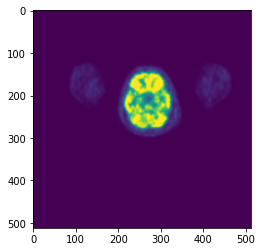

In [32]:
plt.imshow(tst[360])

In [143]:
import PIL
t = PIL.Image.open('/data/burenko/datasets/pet-ct/LRC_2414-2614_990004936_70004019/000.png').convert('RGB')

In [144]:
trans = transforms.PILToTensor()
tmp = trans(t)

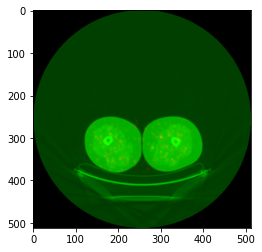

In [150]:
plt.imshow(tmp.numpy().transpose((1, 2, 0)))

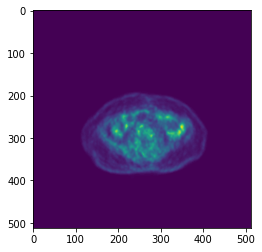

In [124]:
plt.imshow(tst[89])

In [125]:
tst[89].shape

torch.Size([512, 512])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


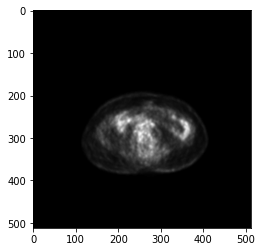

In [23]:
imgplot = plt.imshow(np.array(list(imgs.values()))[0][100, 1, ...], cmap='gray')


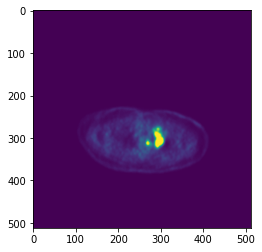

In [35]:
plt.imshow(tst[200])

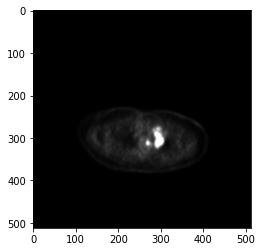

In [46]:
plt.imshow(tst[200].unsqueeze(0).repeat(3, 1, 1).permute(1, 2, 0))

In [45]:
tst[200].unsqueeze(0).repeat(3, 1, 1).permute(1, 2, 0).shape

torch.Size([512, 512, 3])

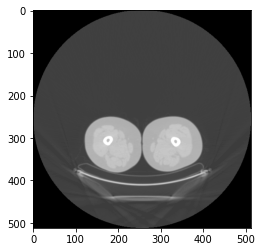

In [44]:
imgplot = plt.imshow(tst[0][0], cmap='gray')

In [50]:
txt_tst = ''
with open('/data/burenko/datasets/pet-ct/LRC_2414-2614_990004936_70004019.txt.txt') as file:
    for line in file:
        txt_tst.join(line.rstrip())

In [60]:
with open('/data/burenko/datasets/pet-ct/LRC_2414-2614_990004936_70004019.txt.txt', 'r') as file:
    data = file.read().rstrip().replace('\n', ' ')

In [61]:
data

'ПЭТ/КТ-всего тела(от затылочной кости до средней трети бедра)  Дата приема: 09.04.2018 Номер карты: 990004933 Пол: Жен Возраст: 59 Дата рождения: 18.05.1958 Наименование медицинской техники: Позитронно-эмиссионный томограф, совмещенный с компьютерным томографом / GE Discovery 610 Радиофармпрепарат: 18Е-ФДГ Введено в/в: 280 Время введения РФП: 09:44 Эффективная доза РФГП: 5.3 Эффективная доза КТ: 16.5 Единицы измерения ($/\\тах): 5/т!* $ИМЬт Контрастное вещество Рег о5: Урографин 76% - 10мл (водный раствор) Контрастное усиление в/в: нет Аллергическая реакция: нет  Причина обращения: рак (инфильтративный низкодифференцированный плоскоклеточный) пищевода. Резекция пищевода с одномоментной пластикой в апреле 2016 г.  Область головы (частично, от орбитомеатальной линии) и шеи: На серии ПЭТ/КТ всего тела (сканирование проведено от орбито-меатальной линии до нижней/трети бедра) при исследовании метаболизма глюкозы по стандартному протоколу без в/в введения йодсодержащего препарата в аксиальн

In [40]:
decompress_zstandard_to_folder('data_examples/LRC_2414-2614_990004982_70004147.npy.zst')

In [44]:
npy_file1 = np.load('data_examples/LRC_2414-2614_990005039_70004144.npy')
npy_file2 = np.load('data_examples/npy_exmpl/LRC_2414-2614_990004982_70004147.npy')

In [42]:
npy_file2.shape

(335, 2, 512, 512)

In [45]:
npy_file1.shape

(263, 2, 512, 512)

In [19]:
npy_file = np.load('data_examples/LRC_2414-2614_990004982_70004147.npy')

In [26]:
npy_file[334]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [62]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('cointegrated/rubert-tiny')

xls = tokenizer(list(data), 
                                    return_tensors="pt", 
                                    padding=True)

In [66]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny")
# model.cuda()  # uncomment it if you have a GPU

def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()


Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [67]:
a = embed_bert_cls(data, model, tokenizer)

In [68]:
a.shape

(312,)

In [90]:
from transformers import AutoTokenizer, AutoModel
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask



#Sentences we want sentence embeddings for
sentences = ['Привет! Как твои дела?',
             'А правда, что 42 твое любимое число?']

#Load AutoModel from huggingface model repository
tokenizer = AutoTokenizer.from_pretrained("sberbank-ai/sbert_large_nlu_ru")
model = AutoModel.from_pretrained("sberbank-ai/sbert_large_nlu_ru")

#Tokenize sentences
encoded_input = tokenizer(data2, padding=True, truncation=True, max_length = 10000, return_tensors='pt')
print(encoded_input)
encoded_input = encoded_input.to(device)
print(encoded_input)
#Compute token embeddings
model.to(device)
with torch.no_grad():
    model_output = model(**encoded_input)

#Perform pooling. In this case, mean pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

{'input_ids': tensor([[   101,   1177,  58633,  ...,  27628, 113018,    102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]])}
{'input_ids': tensor([[   101,   1177,  58633,  ...,  27628, 113018,    102]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]], device='cuda:0')}


RuntimeError: The size of tensor a (1034) must match the size of tensor b (512) at non-singleton dimension 1

In [89]:
import re
data2 = re.sub(r'[^\w\s]', ' ', data).replace('  ', ' ')[512:]

In [81]:
with open('/data/burenko/datasets/pet-ct/LRC_2414-2614_990004936_70004019.txt.txt', 'r') as file:
    data = file.read().rstrip().replace('\n', ' ')

In [82]:
data

'ПЭТ/КТ-всего тела(от затылочной кости до средней трети бедра)  Дата приема: 09.04.2018 Номер карты: 990004933 Пол: Жен Возраст: 59 Дата рождения: 18.05.1958 Наименование медицинской техники: Позитронно-эмиссионный томограф, совмещенный с компьютерным томографом / GE Discovery 610 Радиофармпрепарат: 18Е-ФДГ Введено в/в: 280 Время введения РФП: 09:44 Эффективная доза РФГП: 5.3 Эффективная доза КТ: 16.5 Единицы измерения ($/\\тах): 5/т!* $ИМЬт Контрастное вещество Рег о5: Урографин 76% - 10мл (водный раствор) Контрастное усиление в/в: нет Аллергическая реакция: нет  Причина обращения: рак (инфильтративный низкодифференцированный плоскоклеточный) пищевода. Резекция пищевода с одномоментной пластикой в апреле 2016 г.  Область головы (частично, от орбитомеатальной линии) и шеи: На серии ПЭТ/КТ всего тела (сканирование проведено от орбито-меатальной линии до нижней/трети бедра) при исследовании метаболизма глюкозы по стандартному протоколу без в/в введения йодсодержащего препарата в аксиальн

In [2]:
a = dict(zip(['a', 'b'], [2, 3]))

In [4]:
a.update(zip(['c'], ['device']))

In [5]:
import sys, os

apex_support = False
try:
    sys.path.append('./apex')
    from apex import amp

    apex_support = True
except:
    print("Please install apex for mixed precision training from: https://github.com/NVIDIA/apex")
    apex_support = False

In [4]:
from apex import amp

In [3]:
!pip uninstall apex

Found existing installation: apex 0.9.10.dev0
Uninstalling apex-0.9.10.dev0:
  Would remove:
    /data/proskuryakova/.local/lib/python3.6/site-packages/apex-0.9.10.dev0.dist-info/*
    /data/proskuryakova/.local/lib/python3.6/site-packages/apex/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
